In [1]:
import os
import numpy as np
import pandas as pd
import uproot as ur
import matplotlib.pyplot as plt
import awkward as ak
import vector
import scienceplots
plt.style.use(['science','notebook','grid'])
import time

In [2]:
t1 = time.time()

In [3]:
file = "/home/chandrima/IDM_MuC/dummy_roots/BGnew_mupmum_wpwm.root"

In [4]:
file1 = ur.open(file)

In [5]:
print(file1.classnames())

{'ProcessID0;1': 'TProcessID', 'Delphes;1': 'TTree'}


In [6]:
# treevent = file1["Delphes;1/"]
# treevent.show()

# DEFINITIONS

In [7]:
def px(pt, phi):
    return pt*(np.cos(phi))
def py(pt, phi):
    return pt*(np.sin(phi))
def pz(pt, m, eta):
    return (np.sqrt(pt**2 + m**2))*np.sinh(eta)
def E(pt, m, eta):
    return (np.sqrt(pt**2 + m**2))*np.cosh(eta)

# JET

In [8]:
tree1 = file1["Delphes;1/VLCjetR05_inclusive.PT"]
tree2 = file1["Delphes;1/VLCjetR05_inclusive.Eta"]
tree3 = file1["Delphes;1/VLCjetR05_inclusive.Phi"]
tree4 = file1["Delphes;1/VLCjetR05_inclusive.Mass"]
tree100 = file1["Delphes;1/VLCjetR05_inclusive.Charge"]

tree1.show()
tree2.show()
tree3.show()
tree4.show()
tree100.show()
a = tree1.arrays()
b = tree2.arrays()
c = tree3.arrays()
d = tree4.arrays()
z = tree100.arrays()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
VLCjetR05_inclusive. | float[]                  | AsJagged(AsDtype('>f4'))      
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
VLCjetR05_inclusive. | float[]                  | AsJagged(AsDtype('>f4'))      
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
VLCjetR05_inclusive. | float[]                  | AsJagged(AsDtype('>f4'))      
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
VLCjetR05_inclusive. | float[]                  | AsJagged(AsDtype('>f4'))      
name                 | typen

In [9]:
JPT = a["VLCjetR05_inclusive.PT"]
Jeta = b["VLCjetR05_inclusive.Eta"]
Jphi = c["VLCjetR05_inclusive.Phi"]
Jm = d["VLCjetR05_inclusive.Mass"]
Jch = z["VLCjetR05_inclusive.Charge"]


# Jet Data Frame

In [10]:
pxj = px(JPT,Jphi).tolist()
pyj = py(JPT,Jphi).tolist()
pzj = pz(JPT, Jm, Jeta).tolist()
Ej =  E(JPT, Jm, Jeta).tolist()
jpt = JPT.tolist()
jeta = Jeta.tolist()
jphi = Jphi.tolist()
jm = Jm.tolist()
jch = Jch.tolist()

In [11]:
numj = [len(i) for i in Ej]

In [12]:
data1 = {'jet_num': numj,'jpt':jpt, 'jeta':jeta, 'jphi':jphi,'jm':jm, 'jch':jch, 'pxj':pxj,'pyj':pyj, 'pzj':pzj,'Ej':Ej}

In [13]:
t1 = time.time()

In [14]:
df_jet = pd.DataFrame(data1, index = [i for i in range(len(Ej))])
df_jet.index = range(1, len(df_jet) + 1)
df_jet

,jet_num,jpt,jeta,jphi,jm,jch,pxj,pyj,pzj,Ej
1,0,[],[],[],[],[],[],[],[],[]
2,0,[],[],[],[],[],[],[],[],[]
3,1,[493.8994140625],[-0.8531402945518494],[0.08107952028512955],[7.62939453125e-06],[1],[492.27685546875],[40.00126647949219],[-474.373291015625],[684.8114013671875]
4,0,[],[],[],[],[],[],[],[],[]
5,0,[],[],[],[],[],[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...
49996,0,[],[],[],[],[],[],[],[],[]
49997,0,[],[],[],[],[],[],[],[],[]
49998,0,[],[],[],[],[],[],[],[],[]
49999,0,[],[],[],[],[],[],[],[],[]


In [15]:
t2 = time.time()
print(t2-t1)

0.12434148788452148


# Electron

In [16]:
tree5 = file1["Delphes;1/Electron.PT"]
tree6 = file1["Delphes;1/Electron.Eta"]
tree7 = file1["Delphes;1/Electron.Phi"]
tree101 = file1["Delphes;1/Electron.Charge"]

tree5.show()
tree6.show()
tree7.show()
tree101.show()
e = tree5.arrays()
f = tree6.arrays()
g = tree7.arrays()
y = tree101.arrays()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Electron.PT          | float[]                  | AsJagged(AsDtype('>f4'))      
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Electron.Eta         | float[]                  | AsJagged(AsDtype('>f4'))      
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Electron.Phi         | float[]                  | AsJagged(AsDtype('>f4'))      
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Electron.Charge      | int32_t[]                | AsJagged(AsDtype('>i4'))      


In [17]:
EPT = e["Electron.PT"]
Eeta = f["Electron.Eta"]
Ephi = g["Electron.Phi"]
Ech = y["Electron.Charge"]

# Electron Data Frame

In [18]:
me = 0
pxe = px(EPT,Ephi).tolist()
pye = py(EPT,Ephi).tolist()
pze = pz(EPT, me, Eeta).tolist()
Ee =  E(EPT, me, Eeta).tolist()
ept = EPT.tolist()
eeta = Eeta.tolist()
ephi = Ephi.tolist()
ech = Ech.tolist()

In [19]:
nume = [len(i) for i in Ee]

In [20]:
data2 = {'e_num': nume,'ept':ept, 'eeta':eeta, 'ephi':ephi,'ech':ech, 'pxe':pxe,'pye':pye, 'pze':pze,'Ee':Ee}

In [21]:
df_e = pd.DataFrame(data2, index = [i for i in range(len(Ee))])
df_e.index = range(1, len(df_e) + 1)
df_e

,e_num,ept,eeta,ephi,ech,pxe,pye,pze,Ee
1,2,"[263.83746337890625, 124.1348648071289]","[0.4690016508102417, 0.6790759563446045]","[-2.7024614810943604, 0.7155774235725403]","[1, -1]","[-238.804931640625, 93.68638610839844]","[-112.17134857177734, 81.4390869140625]","[128.32672119140625, 90.9268798828125]","[293.3904724121094, 153.87384033203125]"
2,0,[],[],[],[],[],[],[],[]
3,1,[120.33375549316406],[1.2388160228729248],[2.883610725402832],[1],[-116.35153198242188],[30.700725555419922],[190.23548889160156],[225.09942626953125]
4,1,[33.6580696105957],[-1.7653295993804932],[-2.1154394149780273],[-1],[-17.438678741455078],[-28.78816032409668],[-95.46047973632812],[101.22039031982422]
5,1,[277.7876892089844],[-0.7675508260726929],[-0.2174234688282013],[1],[271.2475891113281],[-59.92282485961914],[-234.77706909179688],[363.7118225097656]
...,...,...,...,...,...,...,...,...,...
49996,2,"[60.1168327331543, 33.55412673950195]","[-1.8614078760147095, 0.30377575755119324]","[2.5762085914611816, -1.6942626237869263]","[1, -1]","[-50.76162338256836, -4.132286548614502]","[32.20700454711914, -33.298702239990234]","[-188.6866912841797, 10.350421905517578]","[198.03207397460938, 35.114253997802734]"
49997,1,[163.9674072265625],[-1.9323081970214844],[-2.984414577484131],[1],[-161.9461669921875],[-25.666095733642578],[-554.2604370117188],[578.005126953125]
49998,1,[87.23701477050781],[0.7043774724006653],[1.4838675260543823],[1],[7.573861598968506],[86.90760803222656],[66.65653228759766],[109.78792572021484]
49999,2,"[424.9954833984375, 371.49609375]","[-1.7717989683151245, -1.2571827173233032]","[2.5685770511627197, -0.56272292137146]","[-1, 1]","[-357.1108703613281, 314.2134704589844]","[230.4191436767578, -198.18991088867188]","[-1213.6590576171875, -600.1610717773438]","[1285.919677734375, 705.834716796875]"


# Muon

In [22]:
tree8 = file1["Delphes;1/Muon.PT"]
tree9 = file1["Delphes;1/Muon.Eta"]
tree10 = file1["Delphes;1/Muon.Phi"]
tree102 = file1["Delphes;1/Muon.Charge"]


tree8.show()
tree9.show()
tree10.show()
tree102.show()
k = tree8.arrays()
l = tree9.arrays()
m = tree10.arrays()
x = tree102.arrays()


name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Muon.PT              | float[]                  | AsJagged(AsDtype('>f4'))      
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Muon.Eta             | float[]                  | AsJagged(AsDtype('>f4'))      
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Muon.Phi             | float[]                  | AsJagged(AsDtype('>f4'))      
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Muon.Charge          | int32_t[]                | AsJagged(AsDtype('>i4'))      


In [23]:
Mpt = k["Muon.PT"]
MEta = l["Muon.Eta"]
Mphi = m["Muon.Phi"]
Mch = x["Muon.Charge"]

# Muon Data Frame

In [24]:
mm = 0
pxm = px(Mpt,Mphi).tolist()
pym = py(Mpt,Mphi).tolist()
pzm = pz(Mpt, mm, MEta).tolist()
Em =  E(Mpt, mm, MEta).tolist()
mpt = Mpt.tolist()
meta = MEta.tolist()
mphi = Mphi.tolist()
mch = Mch.tolist()

In [25]:
numm = [len(i) for i in Em]

In [26]:
data3 = {'m_num': numm,'mpt':mpt, 'meta':meta, 'mphi':mphi,'mch':mch, 'pxm':pxm,'pym':pym, 'pzm':pzm,'Em':Em}

In [27]:
df_m = pd.DataFrame(data3, index = [i for i in range(len(Em))])
df_m.index = range(1, len(df_m) + 1)
df_m

,m_num,mpt,meta,mphi,mch,pxm,pym,pzm,Em
1,0,[],[],[],[],[],[],[],[]
2,0,[],[],[],[],[],[],[],[]
3,0,[],[],[],[],[],[],[],[]
4,1,[19.542287826538086],[0.09580384194850922],[-0.2992074191570282],[1],[18.67403221130371],[-5.760342121124268],[1.875091552734375],[19.632038116455078]
5,0,[],[],[],[],[],[],[],[]
...,...,...,...,...,...,...,...,...,...
49996,0,[],[],[],[],[],[],[],[]
49997,1,[77.48457336425781],[-0.9764471054077148],[0.9255145192146301],[-1],[46.601051330566406],[61.9047737121582],[-88.26885223388672],[117.45318603515625]
49998,0,[],[],[],[],[],[],[],[]
49999,0,[],[],[],[],[],[],[],[]


# Photon

In [28]:
tree11 = file1["Delphes;1/Photon.PT"]
tree12 = file1["Delphes;1/Photon.Eta"]
tree13 = file1["Delphes;1/Photon.Phi"]

tree11.show()
tree12.show()
tree13.show()
n = tree11.arrays()
o = tree12.arrays()
p = tree13.arrays()


name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Photon.PT            | float[]                  | AsJagged(AsDtype('>f4'))      
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Photon.Eta           | float[]                  | AsJagged(AsDtype('>f4'))      
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Photon.Phi           | float[]                  | AsJagged(AsDtype('>f4'))      


In [29]:
Ppt = n["Photon.PT"]
Peta = o["Photon.Eta"]
Pphi = p["Photon.Phi"]

# Photon Data Frame

In [30]:
mp = 0
pxp = px(Ppt,Pphi).tolist()
pyp = py(Ppt,Pphi).tolist()
pzp = pz(Ppt,mp, Peta).tolist()
Ep =  E(Ppt,mp, Peta).tolist()
ppt = Ppt.tolist()
peta = Peta.tolist()
pphi = Pphi.tolist()

In [31]:
nump = [len(i) for i in Ep]

In [32]:
data4 = {'p_num': nump,'ppt':ppt, 'peta':peta, 'pphi':pphi, 'pxp':pxp,'pyp':pyp, 'pzp':pzp,'Ep':Ep}

In [33]:
df_p = pd.DataFrame(data4, index = [i for i in range(len(Ep))])
df_p.index = range(1, len(df_p) + 1)
df_p

,p_num,ppt,peta,pphi,pxp,pyp,pzp,Ep
1,0,[],[],[],[],[],[],[]
2,0,[],[],[],[],[],[],[]
3,1,[479.0005187988281],[-0.8531402945518494],[0.08107952028512955],[477.4269104003906],[38.794593811035156],[-460.06341552734375],[664.1534423828125]
4,0,[],[],[],[],[],[],[]
5,0,[],[],[],[],[],[],[]
...,...,...,...,...,...,...,...,...
49996,0,[],[],[],[],[],[],[]
49997,0,[],[],[],[],[],[],[]
49998,0,[],[],[],[],[],[],[]
49999,0,[],[],[],[],[],[],[]


# Forward_Muon

In [34]:
tree14 = file1["Delphes;1/ForwardMuon.PT"]
tree15 = file1["Delphes;1/ForwardMuon.Eta"]
tree16 = file1["Delphes;1/ForwardMuon.Phi"]
tree17 = file1["Delphes;1/ForwardMuon.Charge"]


tree14.show()
tree15.show()
tree16.show()
tree17.show()
q = tree14.arrays()
r = tree15.arrays()
s = tree16.arrays()
t = tree17.arrays()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
ForwardMuon.PT       | float[]                  | AsJagged(AsDtype('>f4'))      
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
ForwardMuon.Eta      | float[]                  | AsJagged(AsDtype('>f4'))      
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
ForwardMuon.Phi      | float[]                  | AsJagged(AsDtype('>f4'))      
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
ForwardMuon.Charge   | int32_t[]                | AsJagged(AsDtype('>i4'))      


In [35]:
FMpt = q["ForwardMuon.PT"]
FMEta = r["ForwardMuon.Eta"]
FMphi = s["ForwardMuon.Phi"]
FMch = t["ForwardMuon.Charge"]

# Forward Muon Data Frame

In [36]:
Fmm = 0
pxfm = px(FMpt,FMphi).tolist()
pyfm = py(FMpt,FMphi).tolist()
pzfm = pz(FMpt,Fmm, FMEta).tolist()
Efm =  E(FMpt, Fmm, FMEta).tolist()
fmpt = FMpt.tolist()
fmeta = FMEta.tolist()
fmphi = FMphi.tolist()
fmch = FMch.tolist()

In [37]:
numfm = [len(i) for i in Efm]

In [38]:
data5 = {'fm_num': numfm,'fmpt':fmpt, 'fmeta':fmeta, 'fmphi':fmphi, 'fmch': fmch, 'pxfm':pxfm,'pyfm':pyfm, 'pzfm':pzfm,'Efm':Efm}

In [39]:
df_fm = pd.DataFrame(data5, index = [i for i in range(len(Efm))])
df_fm.index = range(1, len(df_fm) + 1)
df_fm

,fm_num,fmpt,fmeta,fmphi,fmch,pxfm,pyfm,pzfm,Efm
1,2,"[76.30271911621094, 12.240114212036133]","[-4.711007595062256, 6.649478435516357]","[0.052704818546772, 2.671386241912842]","[-1, 1]","[76.19676971435547, -10.911752700805664]","[4.019659519195557, 5.545632362365723]","[-4240.71875, 4727.01025390625]","[4241.4052734375, 4727.02587890625]"
2,3,"[235.2027130126953, 72.64179229736328, 16.4038...","[3.431060314178467, -4.690607070922852, 2.5658...","[-2.082411766052246, -2.8599207401275635, -1.2...","[1, -1, -1]","[-115.1520767211914, -69.77912902832031, 5.505...","[-205.08612060546875, -20.191661834716797, -15...","[3631.1826171875, -3955.712646484375, 106.0947...","[3638.7919921875, 3956.379150390625, 107.35536..."
3,1,[16.390966415405273],[-6.273305892944336],[-1.6948521137237549],[-1],[-2.0281827449798584],[-16.26500129699707],[-4345.4541015625],[4345.48486328125]
4,2,"[87.06119537353516, 20.752046585083008]","[-4.52202844619751, 6.063023090362549]","[-2.3455424308776855, -0.3617643713951111]","[-1, 1]","[-60.90232467651367, 19.408845901489258]","[-62.21381378173828, -7.344667434692383]","[-4005.302978515625, 4458.26708984375]","[4006.248779296875, 4458.31494140625]"
5,2,"[123.0623550415039, 18.701539993286133]","[4.302504062652588, 2.798793315887451]","[2.047436475753784, 1.7373260259628296]","[1, -1]","[-56.46056365966797, -3.099987268447876]","[109.34600067138672, 18.442821502685547]","[4545.3720703125, 153.01536560058594]","[4547.03759765625, 154.1539764404297]"
...,...,...,...,...,...,...,...,...,...
49996,2,"[119.05197143554688, 11.878924369812012]","[4.487946033477783, -6.582681655883789]","[0.8491945862770081, -0.20788545906543732]","[1, -1]","[78.6443099975586, 11.62316608428955]","[89.37810516357422, -2.451707124710083]","[5293.4873046875, -4291.099609375]","[5294.826171875, 4291.1162109375]"
49997,2,"[32.2593879699707, 20.37411117553711]","[5.568282604217529, -5.781266212463379]","[-1.4487255811691284, 0.7322576642036438]","[1, -1]","[3.928154945373535, 15.1515531539917]","[-32.01933288574219, 13.621118545532227]","[4225.65673828125, -3302.30029296875]","[4225.77978515625, 3302.363037109375]"
49998,3,"[93.80062103271484, 82.60022735595703, 23.4624...","[-4.4401445388793945, 4.684273719787598, 2.968...","[-0.3246397078037262, -2.8439548015594482, 1.8...","[-1, 1, -1]","[88.90100860595703, -78.96845245361328, -5.479...","[-29.919334411621094, -24.223569869995117, 22....","[-3975.992431640625, 4469.59716796875, 227.774...","[3977.098876953125, 4470.3603515625, 228.97991..."
49999,2,"[23.35181999206543, 15.246129989624023]","[-5.095223426818848, 6.570876121520996]","[-1.7551809549331665, -2.6733644008636475]","[-1, 1]","[-4.281360626220703, -13.605177879333496]","[-22.955989837646484, -6.880668640136719]","[-1905.90771484375, 5442.8203125]","[1906.0506591796875, 5442.841796875]"


# MERGED DATA FRAME

In [40]:
t1 = time.time()
big_df = pd.concat([df_jet, df_e, df_m, df_p, df_fm], axis=1)
big_df
t2= time.time()
print(t2-t1)

0.03732657432556152


# Triggers

In [111]:
# 1. Two forward Muons
big_df2 = big_df[big_df['fm_num'] == 2]

In [112]:
# 2. eta1 eta2 product less than zero
big_df3 = big_df2[big_df2['fmeta'].apply(lambda x: (x[0] * x[1]) < 0)]
# big_df3[big_df3['Efm'].apply(lambda x: any(i < 500 for i in x))]


In [113]:
big_df0 = big_df3[big_df3['fmeta'].apply(lambda x: ((np.abs(x[0]) and np.abs(x[1])) <= 7 and ((np.abs(x[0]) and np.abs(x[1])) >= 2.5)))]


In [128]:
# 3. Energy of forward muons greater than 500 GeV
big_df4 = big_df0[big_df0['Efm'].apply(lambda x: x[0] > 500 and x[1] > 500)]
#big_df4 = big_df3[big_df3['Efm'].apply(lambda x: all(i > 500 for i in x))]
len(big_df4)

41449

In [129]:
# 4. No leptons and Jets in Central region (Missing Energy)
big_df6 = big_df4[(big_df4['jet_num'] == 0) & (big_df4['e_num'] == 0) & (big_df4['m_num'] == 0 )]
big_df6

,jet_num,jpt,jeta,jphi,jm,jch,pxj,pyj,pzj,Ej,...,Ep,fm_num,fmpt,fmeta,fmphi,fmch,pxfm,pyfm,pzfm,Efm
74,0,[],[],[],[],[],[],[],[],[],...,[],2,"[15.562580108642578, 10.205208778381348]","[5.888091564178467, -6.401538848876953]","[2.678067922592163, 0.5398937463760376]","[1, -1]","[-13.920450210571289, 8.753653526306152]","[6.958086967468262, 5.245935440063477]","[2806.81591796875, -3075.6982421875]","[2806.859130859375, 3075.715087890625]"
212,0,[],[],[],[],[],[],[],[],[],...,[],2,"[34.510311126708984, 15.80211353302002]","[-3.6805567741394043, 6.307431697845459]","[0.4151705205440521, -1.2692686319351196]","[1, 1]","[31.578575134277344, 4.692901134490967]","[13.919594764709473, -15.089184761047363]","[-684.0507202148438, 4334.7744140625]","[684.9207153320312, 4334.8037109375]"
338,0,[],[],[],[],[],[],[],[],[],...,[],2,"[261.6178283691406, 210.14112854003906]","[3.270901918411255, -3.9802112579345703]","[0.24328240752220154, 3.1185905933380127]","[1, -1]","[253.91383361816406, -210.08554077148438]","[63.02103042602539, 4.833252429962158]","[3439.896240234375, -5622.29052734375]","[3449.830322265625, 5626.2158203125]"
532,0,[],[],[],[],[],[],[],[],[],...,[],2,"[52.57854461669922, 15.392385482788086]","[-5.139046669006348, 6.4250102043151855]","[1.209224820137024, 0.19037029147148132]","[-1, 1]","[18.599374771118164, 15.114310264587402]","[49.178924560546875, 2.912585973739624]","[-4483.56298828125, 4749.20849609375]","[4483.87109375, 4749.23388671875]"
723,0,[],[],[],[],[],[],[],[],[],...,[10.622973442077637],2,"[44.34981155395508, 20.309707641601562]","[5.1690239906311035, -6.040529251098633]","[0.6289228796958923, 1.1761891841888428]","[1, -1]","[35.863990783691406, 7.807977199554443]","[26.08984375, 18.748859405517578]","[3896.963134765625, -4266.185546875]","[3897.215576171875, 4266.23388671875]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49305,0,[],[],[],[],[],[],[],[],[],...,[],2,"[371.82830810546875, 247.8110809326172]","[3.2065041065216064, -3.5478641986846924]","[-1.4621632099151611, 1.7873618602752686]","[1, -1]","[40.31346893310547, -53.24881362915039]","[-369.636474609375, 242.0225067138672]","[4583.1767578125, -4300.79345703125]","[4598.2353515625, 4307.9267578125]"
49371,0,[],[],[],[],[],[],[],[],[],...,[],2,"[30.665952682495117, 14.308460235595703]","[-5.346205234527588, 6.5247111320495605]","[0.8054900169372559, -0.48053762316703796]","[-1, 1]","[21.244081497192383, 12.68797779083252]","[22.115371704101562, -6.614171504974365]","[-3216.947998046875, 4877.62060546875]","[3217.093994140625, 4877.64111328125]"
49423,0,[],[],[],[],[],[],[],[],[],...,[],2,"[52.508697509765625, 10.577876091003418]","[-5.125018119812012, 6.676140308380127]","[-2.246408700942993, -1.911262035369873]","[-1, 1]","[-32.837642669677734, -3.532228708267212]","[-40.97380065917969, -9.970698356628418]","[-4415.22607421875, 4195.451171875]","[4415.53857421875, 4195.46484375]"
49495,0,[],[],[],[],[],[],[],[],[],...,[],2,"[66.12899017333984, 10.058831214904785]","[4.894037246704102, -5.649597644805908]","[-2.669010639190674, 2.2450733184814453]","[1, -1]","[-58.880985260009766, -6.280057430267334]","[-30.101043701171875, 7.857542037963867]","[4413.57861328125, -1429.22705078125]","[4414.07421875, 1429.2623291015625]"


In [130]:
big_df5 = big_df6[big_df6['Efm'].apply(lambda x: (x[0] + x[1]) <= 10000)]
len(big_df5)

431

In [131]:
# # 4. No leptons and Jets in Central region (Missing Energy)
# big_df6 = big_df5[(big_df5['jet_num'] == 0) & (big_df5['e_num'] == 0) & (big_df5['m_num'] == 0 )]
# big_df6

In [132]:
100*(431 / 50000)

0.8619999999999999

# # Observables!

# 1) Invariant Mass

In [133]:
def mm(Efm, pxfm, pyfm, pzfm):
    return np.sqrt((Efm[:,0]+Efm[:,1])**2 - (pxfm[:,0]+pxfm[:,1])**2 - (pyfm[:,0]+pyfm[:,1])**2 - (pzfm[:,0]+pzfm[:,1])**2)

In [134]:
Efm2 = np.array(big_df5['Efm'].tolist())
pxfm2 = np.array(big_df5['pxfm'].tolist())
pyfm2 = np.array(big_df5['pyfm'].tolist())
pzfm2 = np.array(big_df5['pzfm'].tolist())

# Plotting the Invariant Mass of two Forward Muons

In [135]:
invM = mm(Efm2, pxfm2, pyfm2, pzfm2)
invM.min()

2181.00483763278

In [140]:
df_check = pd.DataFrame({'invM': invM, 'Emf1': Efm2[:,0], 'Emf2': Efm2[:,1] })
df_check

,invM,Emf1,Emf2
0,5876.410988,2806.859131,3075.715088
1,3445.073706,684.920715,4334.803711
2,8809.383840,3449.830322,5626.215820
3,9229.074163,4483.871094,4749.233887
4,8154.855253,3897.215576,4266.233887
...,...,...,...
426,8900.760110,4598.235352,4307.926758
427,7922.468762,3217.093994,4877.641113
428,8607.970768,4415.538574,4195.464844
429,5023.294440,4414.074219,1429.262329


In [141]:
df_results = pd.DataFrame({'Invariant_Mass': invM})

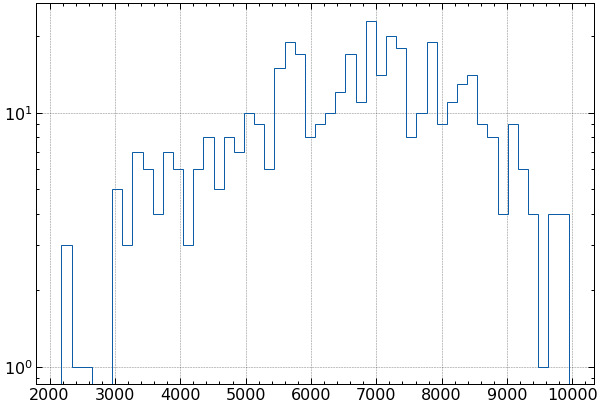

In [142]:
plt.figure(figsize=(10,7))
plt.hist(invM, histtype = 'step', bins = 50)
plt.yscale('log')
plt.show()

# 2) Missing Invariant Mass (MIM) 

In [143]:
def delP_sq(Eb, Emu, Pxm, Pym, Pzm):

    return np.abs(4*Eb**2 - 4*Eb*(Emu[:,0]+Emu[:,1]) + 2*(Emu[:,0]*Emu[:,1] - (Pxm[:,0]*Pxm[:,1] + Pym[:,0]*Pym[:,1] + Pzm[:,0]*Pzm[:,1])) + (Emu[:,0]**2 - (Pxm[:,0]**2 + Pym[:,0]**2 + Pzm[:,0]**2)) + (Emu[:,1]**2 - (Pxm[:,1]**2 + Pym[:,1]**2 + Pzm[:,1]**2)))


In [144]:
delp_sq2 = delP_sq(5000, Efm2, pxfm2, pyfm2, pzfm2) 

In [145]:
MIM2 = np.sqrt(delp_sq2)

In [146]:
df_results['MIM'] = MIM2

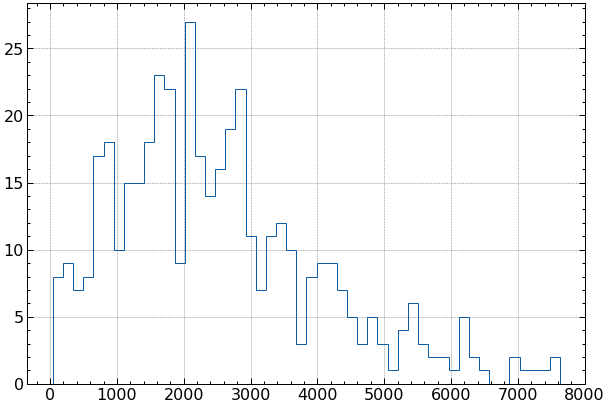

In [147]:
plt.figure(figsize=(10,7))
plt.hist(MIM2, histtype = 'step', bins = 50)
plt.show()

# 3) Eta_Distribution

In [148]:
fmeta2 = np.array(big_df5['fmeta'].tolist())
fmphi2 = np.array(big_df5['fmphi'].tolist())
fmpt2 = np.array(big_df5['fmpt'].tolist())

In [149]:
fmeta3 = big_df5['fmeta'].reset_index(drop=True)
df_results['fmeta'] = fmeta3

In [150]:
fmeta2

array([[ 5.88809156, -6.40153885],
       [-3.68055677,  6.3074317 ],
       [ 3.27090192, -3.98021126],
       [-5.13904667,  6.4250102 ],
       [ 5.16902399, -6.04052925],
       [-5.51657343,  6.35727978],
       [ 5.36556625, -5.78750992],
       [ 2.6102953 , -3.16763592],
       [ 3.94891262, -6.15946817],
       [-3.46184015,  4.47329235],
       [ 4.01048613, -5.51842833],
       [ 2.9365015 , -6.44747162],
       [-3.96034622,  6.88181257],
       [ 5.73525143, -6.40956736],
       [-4.20373106,  6.88122368],
       [-4.92704058,  6.15029573],
       [-4.58127308,  6.26525974],
       [-2.91416407,  4.7175684 ],
       [-6.20608187,  5.95920038],
       [ 5.887043  , -6.68227482],
       [-4.41549635,  6.21500731],
       [-5.70169306,  5.63143206],
       [ 5.02550173, -5.05315685],
       [-6.19905567,  5.77029181],
       [-3.15662837,  5.49003124],
       [-4.60144234,  4.82582855],
       [ 3.18437004, -5.01326275],
       [ 5.85868454, -6.45293808],
       [ 3.71940088,

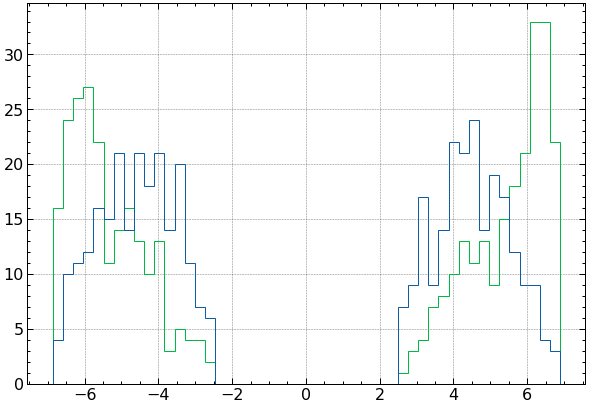

In [151]:
plt.figure(figsize=(10,7))
plt.hist(fmeta2, histtype = 'step', bins =50)
plt.show()

# 4) Delta_Eta

In [152]:
def deltaeta(eta):
    return np.abs((eta[:,0]) - (eta[:,1]))

In [153]:
deleta2 = deltaeta(fmeta2)

In [154]:
df_results['del_fmeta'] = deleta2

# Plotting

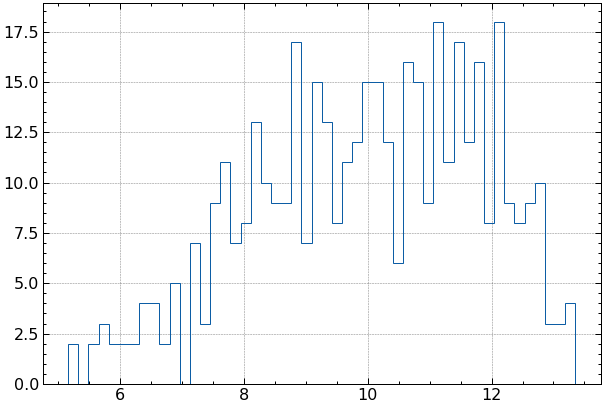

In [155]:
plt.figure(figsize=(10,7))
plt.hist(deleta2, histtype = 'step', bins =50)
plt.show()

# 5) Delta_PHI

In [156]:
def delphi(phi):
    del_phi = np.abs(phi[:, 0] - phi[:, 1])
    del_phi = np.where(del_phi > np.pi, 2*np.pi - del_phi, del_phi)
    return del_phi

In [157]:
# def delphi(phi):
#     del_phi = phi[:, 0] - phi[:, 1]
#     del_phi = np.where(del_phi >= -np.pi, del_phi, del_phi + 2 * np.pi)
#     del_phi = np.where(del_phi <= np.pi, del_phi, del_phi - 2 * np.pi)
    
#     return del_phi

In [158]:
delphi2 = delphi(fmphi2)

In [159]:
df_results['del_phi'] = delphi2

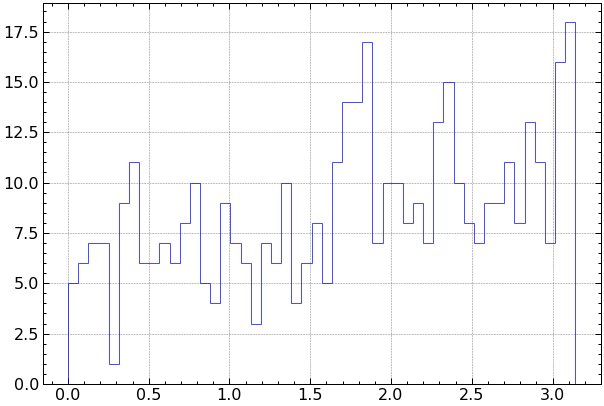

In [160]:
plt.figure(figsize=(10, 7))  
plt.hist(delphi2, bins=50, color='blue', alpha=0.7, histtype = 'step')
plt.show()

# 6) Delta_R

In [161]:
def delR(delPhi, delEta):
    return np.sqrt(delphi**2 + delEta**2)

In [162]:
delRfm = np.sqrt(delphi2**2 + deleta2**2)

In [163]:
df_results['delR_fm'] = delRfm

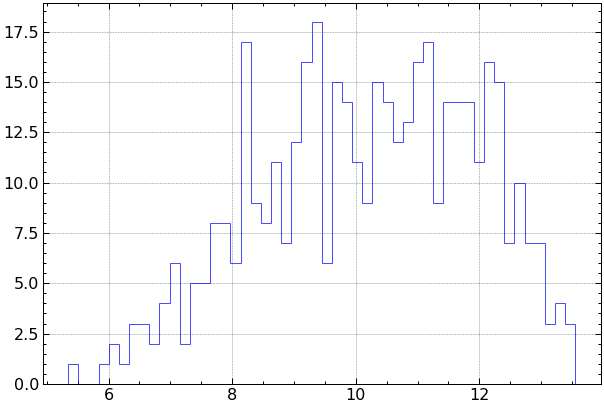

In [164]:
plt.figure(figsize=(10, 7))  
plt.hist(delRfm, bins=50, color='blue', alpha=0.7, histtype = 'step')
plt.show()

# 7) Energy of Forward Muons

In [165]:
Emin = np.min(Efm2, axis=1).reshape(-1,1)

In [166]:
Emax = np.max(Efm2, axis=1).reshape(-1,1)

In [167]:
totE = np.sum(Efm2, axis = 1).reshape(-1,1)

In [168]:
df_results['Emin_fm'] = Emin
df_results['Emax_fm'] = Emax
df_results['totE_fm'] = totE

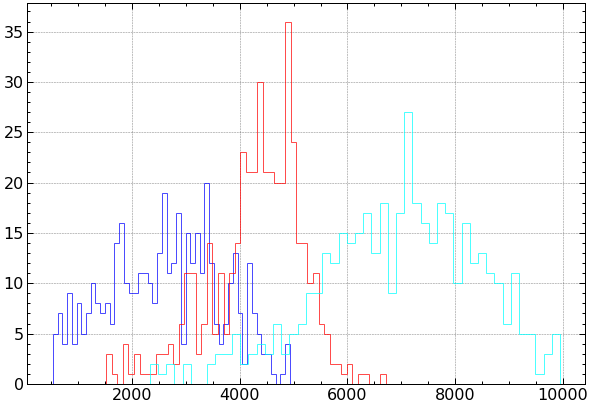

In [169]:
plt.figure(figsize=(10, 7))  
plt.hist(Emin, bins=50, color='blue', alpha=0.7, histtype = 'step')
plt.hist(Emax, bins=50, color='red', alpha=0.7, histtype = 'step')
plt.hist(totE, bins=50, color='cyan', alpha=0.7, histtype = 'step')
plt.show()

# 8) P_T of forward muons

In [170]:
def PTMu(px, py):
    return np.sqrt((px[:,0] + px[:,1])**2 +(py[:,0] + py[:,1])**2)

In [171]:
ptmu = PTMu(pxfm2, pyfm2)

In [172]:
df_results['PT_fm'] = ptmu

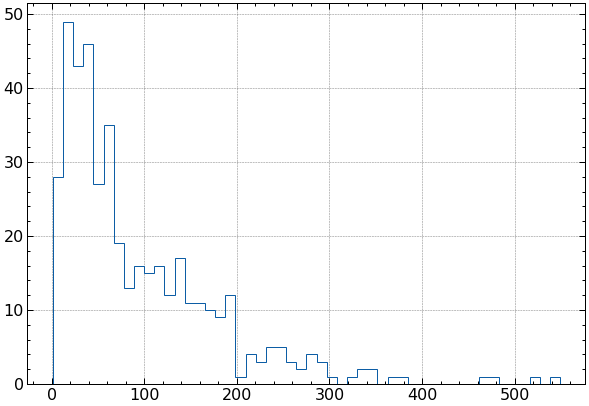

In [173]:
plt.figure(figsize=(10, 7))
plt.hist(ptmu, histtype = 'step', bins =50)
plt.show()

# 9) Missing Transverse Energy MET

In [174]:
pxj2 = big_df5['pxj'].tolist()
pyj2 = big_df5['pyj'].tolist()
pxe2 = big_df5['pxe'].tolist()
pye2 = big_df5['pye'].tolist()
pxm2 = big_df5['pxm'].tolist()
pym2 = big_df5['pym'].tolist()
pxp2 = big_df5['pxp'].tolist()
pyp2 = big_df5['pyp'].tolist()
pxfm3 = big_df5['pxfm'].tolist()
pyfm3 = big_df5['pyfm'].tolist()

In [175]:
tpx = ak.concatenate([pxj2, pxe2, pxm2, pxp2, pxfm2], axis=1)
tpy = ak.concatenate([pyj2, pye2, pym2, pyp2, pyfm2], axis=1)

In [176]:
sum_px = ak.sum(tpx, axis=1)
sum_py = ak.sum(tpy, axis=1)

In [177]:
MET = np.sqrt(sum_px**2 + sum_py**2)

In [178]:
df_results['MET'] = MET

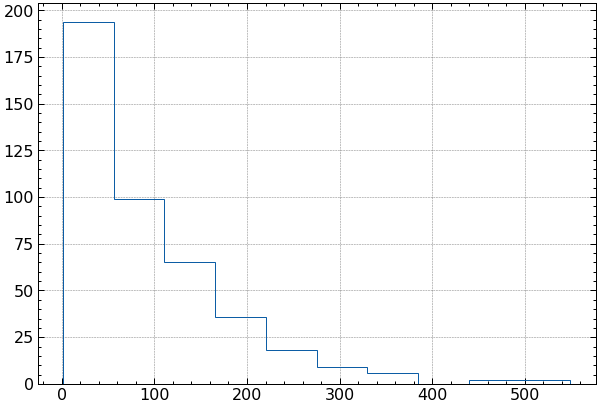

In [181]:
plt.figure(figsize=(10, 7))  
plt.hist(MET, bins=10, histtype ='step')
plt.show()

# Saving the data frames

In [89]:
# df_results.to_pickle('/home/chandrima/IDM_MuC/Results_new/IDM_BKG_higgs_dist.pkl')

In [90]:
# big_df5.to_pickle('/home/chandrima/IDM_MuC/Results_new/IDM_BKG_wpwm_param.pkl')

In [91]:
t2 = time.time()
print((t2-t1)/60)

0.07476046880086264


In [92]:
# # 4. No leptons and Jets in Central region (Missing Energy)
# big_df5 = big_df4[(big_df4['jet_num'] == 0) & (big_df4['e_num'] == 0) & (big_df4['m_num'] == 0)]
# len(big_df5)